# <center>Police Killings</center>

In [1]:
# importing pandas module
import pandas as pd

In [2]:
# reading police_killings data
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
# getting top 5 rows
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
# columns / headers
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [4]:
# counting raceethnicity
raceethnicity_counts = police_killings['raceethnicity'].value_counts()
raceethnicity_counts

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [5]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x1dca3ac0780>,
 <a list of 6 Text xticklabel objects>)

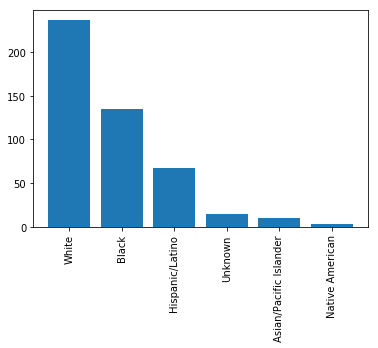

In [6]:
# raceethnicity bar plot 
plt.bar(range(6), raceethnicity_counts)
plt.xticks(range(6), raceethnicity_counts.index, rotation="vertical")

In [7]:
raceethnicity_counts / sum(raceethnicity_counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

## Findings

It seems Whites are more shooting vistims.

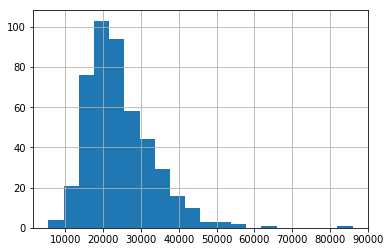

In [8]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)

In [9]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).median()

22348.0

## <center> State Population </center>

In [11]:
state_pop = pd.read_csv("state_population.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [12]:
state_fp_counts = police_killings["state_fp"].value_counts()
state_fp_counts

6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
Name: state_fp, dtype: int64

In [13]:
states = pd.DataFrame({"STATE": state_fp_counts.index, "shootings": state_fp_counts})
states

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22
13,13,16
36,36,13
8,8,12
34,34,11
53,53,11


In [14]:
states = states.merge(state_pop, on="STATE")
states

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4
5,13,16,40,3,5,Georgia,10214860,7710688,75.5
6,36,13,40,1,2,New York,19795791,15584974,78.7
7,8,12,40,4,8,Colorado,5456574,4199509,77.0
8,34,11,40,1,2,New Jersey,8958013,6959192,77.7
9,53,11,40,4,9,Washington,7170351,5558509,77.5


In [15]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]

top_ten = states['rate'].sort_values(ascending=False)
bottom_ten = states['rate'].sort_values(ascending=True)

print('Ten most violent states')
print(top_ten[0:10])
print('\n')
print('Ten least violent states')
print(bottom_ten[0:10])

Ten most violent states
4     5.624674
3     3.661359
27    3.164240
34    2.794071
39    2.708442
33    2.417021
32    2.397956
10    2.355095
7     2.199182
41    2.114312
Name: rate, dtype: float64


Ten least violent states
43    0.278483
22    0.546768
38    0.640226
6     0.656705
29    0.735898
42    0.751536
45    0.752260
11    0.855366
12    0.861073
31    0.866350
Name: rate, dtype: float64


## Killing by State
States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest.

In [16]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
WA    11
NJ    11
IL    11
MD    10
NC    10
OH    10
MO    10
SC     9
MI     9
VA     9
OR     8
AL     8
IN     8
KY     7
PA     7
TN     6
MS     6
MN     6
KS     6
NE     6
UT     5
WI     5
NM     5
MA     5
ID     4
HI     4
AR     4
NV     3
IA     2
MT     2
AK     2
DE     2
WV     2
NH     1
WY     1
DC     1
CT     1
ME     1
Name: state, dtype: int64

In [17]:
pk = police_killings[
                (police_killings['share_white'] != '-') &
                (police_killings['share_black'] != '-') &
                (police_killings['share_hispanic'] != '-')]

pk.is_copy = False

pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [18]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64